## inferencial statistik (why we need)
* mengambil kesimpulan dari populasi berdasarkan sample
* membandingkan sample dari populasi apakah sample kita benar benar berbeda dari populasi
* model machine learning - justifikasi menambahkan atau menguragi ciri
* menguji hipotesa.


### Random variable: variable yang kita amati dan nilainya dari fenomena acak
* discreate: 1,2,3,4,5,6 (ex: jumlah orang, jumlah kendaraan, total pemudik) (curva disebut mass curve)
* continous: 1.24, 1.26 ex(pendapatan, curah hujan, tingi badan)(curva disebut dencity  curve)

In [5]:
import matplotlib.pyplot as plt
from IPython.display import Math, Latex
from IPython.core.display import Image
import seaborn as sns
from scipy.stats import uniform

n = 10000
start = 10
width =20

dat_uniform = uniform.rvs(size=n, loc=start, scale=width)

dat_uniform

array([29.73185063, 18.96581117, 29.22663131, ..., 10.48774982,
       10.56470187, 29.86598514])

[Text(0, 0.5, 'frequency')]

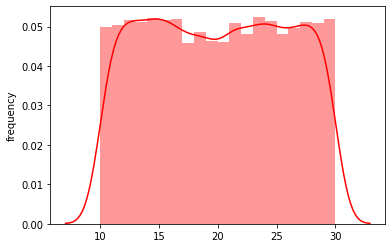

In [13]:
data_plot = sns.distplot(dat_uniform, bins=20, color="red")
data_plot.set( ylabel="frequency")
# uniform distribusion 

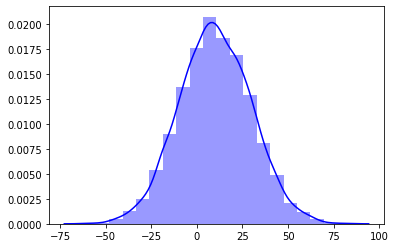

In [16]:
# normal distribusion 
from scipy.stats import norm

dat_norm = norm.rvs(size=n, loc=start, scale=width)
dat_norm
norm_plot = sns.distplot(dat_norm, bins=20, color="blue")

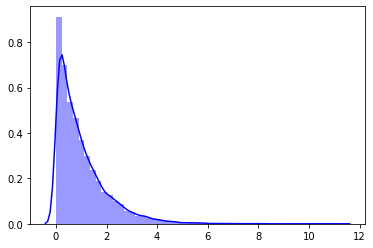

In [25]:
# gamma distribution  chi-squared

from scipy.stats import gamma

dat_gamma = gamma.rvs(size=n, a=1)
dat_gamma = sns.distplot(dat_gamma, bins=50, color="blue")

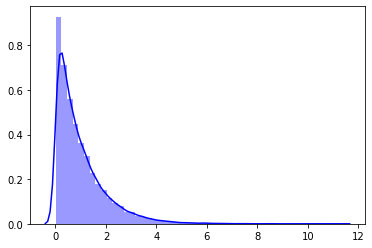

In [32]:
# exponential 
from scipy.stats import expon

dat_expon = expon.rvs(size=n, scale=1, loc=0)
plot_expon = sns.distplot(dat_expon, bins=50, color="blue")

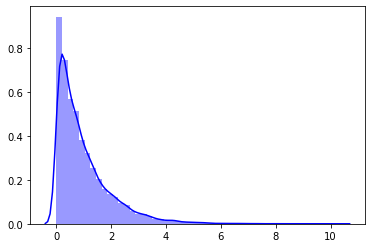

In [34]:
dat_expon = expon.rvs(size=n, scale=1, loc=0)
plot_expon = sns.distplot(dat_expon, bins=50, color="blue")

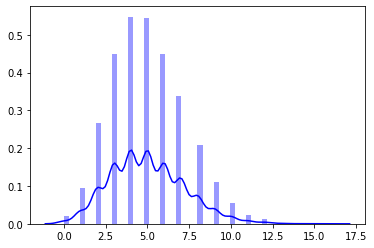

In [38]:
# poisson distribution 
from scipy.stats import poisson

dat_poisson = poisson.rvs(size=n, mu=5)
plot_poisson = sns.distplot(dat_poisson, bins=50, color="blue")

In [40]:
# confidence interfal (seberapa akuran rata2 sample di bandingkan dengan rata2 populasi)
# rata2 usia pertama bekerja antara 20-25 confidence 24 (+-) margn of error  
import pandas as pd
import numpy as np

df = pd.read_csv("./heart.csv")
df["sex_name"] = df.sex.replace({1:"male", 0:"female"})

In [42]:
df_sex_target=df[['target','sex_name']]
df_sex_target

,target,sex_name
0,0,male
1,0,male
2,0,male
3,0,male
4,0,female
...,...,...
1020,1,male
1021,0,male
1022,0,male
1023,1,female


In [45]:
aggregate_heart_dc = pd.crosstab(df_sex_target.target, df_sex_target.sex_name )
aggregate_heart_dc

sex_name,female,male
target,,
0,86,413
1,226,300


In [51]:
n_fm = 86 + 226
p_fHD = 226/n_fm
p_fHD

0.7243589743589743

In [52]:
se_female  = np.sqrt(p_fHD * (1- p_fHD) / n)
se_female

0.004468367158421397

In [56]:
z_score = 1.96 
margin_err = 1.96  * se_female
p_fm_l = p_fHD - margin_err
p_fm_u = p_fHD + margin_err

In [57]:
p_fm_l,p_fm_u

(0.7156009747284684, 0.7331169739894803)

In [64]:
sex_desc = df.groupby("sex_name").agg({"chol": [np.mean, np.std, np.size] })
sex_desc

chol                
                mean        std size
sex_name                            
female    261.455128  64.466781  312
male      239.237027  43.155535  713

mean_fe = 261.455128 
sd = 64.466781
n = 312
z= 1.96
se  = sd / np.sqrt(n)

In [68]:
lcb = mean_fe - (z* se)
ucb = mean_fe + (z* se)

lcb, ucb

(254.30169095203016, 268.6085650479699)

# penarikan kesimpulan 
* hipotesa
* test the hipotesa

In [72]:
df = pd.read_csv("https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/nhanes_2015_2016.csv")
df

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5730,93695,2.0,2.0,NaN,1,2,76,3,1.0,3.0,...,112.0,46.0,59.1,165.8,21.5,38.2,37.0,29.5,95.0,2.0
5731,93696,2.0,2.0,NaN,2,1,26,3,1.0,5.0,...,116.0,76.0,112.1,182.2,33.8,43.4,41.8,42.3,110.2,2.0
5732,93697,1.0,NaN,1.0,1,2,80,3,1.0,4.0,...,146.0,58.0,71.7,152.2,31.0,31.3,37.5,28.8,NaN,2.0
5733,93700,NaN,NaN,NaN,1,1,35,3,2.0,1.0,...,106.0,66.0,78.2,173.3,26.0,40.3,37.5,30.6,98.9,2.0


In [73]:
females = df [df["RIAGENDR"] == 2]
males = df [df["RIAGENDR"] == 1]

females

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0
5,83737,2.0,2.0,NaN,2,2,72,1,2.0,2.0,...,122.0,58.0,64.4,150.0,28.6,34.4,33.5,31.4,92.9,NaN
7,83742,1.0,NaN,1.0,2,2,32,1,2.0,4.0,...,114.0,70.0,64.5,151.3,28.2,34.1,33.1,31.5,93.3,2.0
12,83752,1.0,NaN,2.0,1,2,30,2,1.0,4.0,...,104.0,50.0,71.2,163.6,26.6,37.3,35.7,31.0,90.7,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5724,93682,NaN,NaN,NaN,2,2,41,5,1.0,5.0,...,122.0,84.0,58.2,166.9,20.9,37.1,35.3,26.9,80.8,2.0
5727,93689,2.0,1.0,NaN,2,2,69,1,1.0,1.0,...,166.0,64.0,64.8,151.9,28.1,32.2,32.6,28.7,101.1,2.0
5730,93695,2.0,2.0,NaN,1,2,76,3,1.0,3.0,...,112.0,46.0,59.1,165.8,21.5,38.2,37.0,29.5,95.0,2.0
5732,93697,1.0,NaN,1.0,1,2,80,3,1.0,4.0,...,146.0,58.0,71.7,152.2,31.0,31.3,37.5,28.8,NaN,2.0


In [74]:
nf= len(females)
muf= females["BMXBMI"].mean()
sdf= females["BMXBMI"].std()

nf,muf,sdf

(2976, 29.939945652173996, 7.75331880954568)

In [76]:
nm= len(males)
mum= males["BMXBMI"].mean()
sdm= males["BMXBMI"].std()

nm,mum,sdm

(2759, 28.778072111846985, 6.252567616801485)

In [77]:
import statsmodels.api as sm

/Users/franatagola/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [79]:
zvalue = sm.stats.ztest(females["BMXBMI"].dropna(), males["BMXBMI"].dropna())
zvalue

(6.1755933531383205, 6.591544431126401e-10)